<a href="https://colab.research.google.com/github/Nudkip/DATA_Analysis_web_scraping/blob/main/Day_6_web_scraping_continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 requests-html


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=aee6d4edb7589e9cb562b0a616cf9bb3ee4476998a9519ce1f9dc7b7160e729f
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


requests-html is not automatically installed in google colab. Hence the installation up above using pip. We will also find that Tensor Flow and some other noteworth libraries are not installed. so you will need to use pip when using the co-lab for some libraries.
Next we import some libraries we may need although we didn't end up using nltk today  

In [ ]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

Below we define a function that we didn't end up using today. This one just takes a single URL as input and returns the main text. You may find this one or the next one more useful for scraping some pages. Additionally it will help to always be defining new functions for web-scraping.

In [ ]:
def get_and_parse(url):
  response = requests.get(url)

# Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
  for element in soup(['script', 'style', 'comment']):
      element.extract()

# Extract the visible text
  text = soup.get_text(separator=' ')
  return text

This next function takes two inputs: url and element. In this case you can specify which element you want to scrape. Be it an 'a' [anchor] element, a 'p' [paragraph] element, and so on. What it returns should be a list of all such elements on the page including all the elements and attributes that they contain. From each extracted element we can obtain the attributes and elements that it contains and store those in an object.

In [ ]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

Next our good old sentiment detection that uses some comprehensions and optimized if/else logic to return the right sentiment. Note this is a rules based approach that flags sentiment soley based on whether or not key words have been found.

In [ ]:
def sentiment_detection(sentence):
    positive_words = ('happy', 'sunny', 'positive', 'triumphant', 'optimistic', 'wonderful', 'significant', 'achieve','capabilities','progress','prized')
    negative_words = ('sad', 'terrible', 'frightening', 'rainy', 'scary', 'shocked', 'critical','bottlenecked')

    positive = any(sentence.count(i) > 0 for i in positive_words)
    negative = any(sentence.count(i) > 0 for i in negative_words)

    if positive == negative == False:
        return "neutral"
    elif positive != negative:
        return "positive" if positive else "negative"
    else:
        return "mixed"

We can re-purpose this approach for topic detection as seen with the next function.

In [ ]:
def topic_detection(sentence):
    DataScience_words = ('data science', 'regression', 'predict', 'predictive', 'classify')
    AI_words = ('AI', 'machine learning', 'ml', 'ML', 'NLP', 'LLM','deep learning','neural network','generative', 'GPT-3')
    DataWords = ('analysis', 'algorithms','data','data structure','data-structure','big data')
    DataScience = any(sentence.count(i) > 0 for i in DataScience_words)
    AI = any(sentence.count(i) > 0 for i in AI_words)
    data = any(sentence.count(i) > 0 for i in DataWords)
    topics = []
    if DataScience == True:
        topics.append("Data Science")
    if AI == True:
        topics.append("AI")
    if data == True:
        topics.append("data")
    return topics

Below we parse the paragraph elements and anchor elements from this article

In [ ]:
url = 'https://medium.com/towards-data-science/ai-scaling-why-keeping-up-is-essential-and-how-to-do-it-56be3c2e1e5'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [ ]:

#requirements: print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)
p_dictionary = {}
p_list = []
topic_list = []
for p in range(0, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      #print((paragraphs[p].text))
      #print(f"TALKS ABOUT: {topic_detection(paragraphs[p].text)}")
      p_list.append(paragraphs[p].text)
      topic_list.append(topic_detection(paragraphs[p].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Topics'] = topic_list

In [ ]:
p_dictionary

{'Paragraphs': ['GPT-3 came out in early 2020, and shocked the world.',
  'For the first time, we had an AI system that could write text so humanlike that readers consistently couldn’t tell that it was AI-generated. But more than that, GPT-3 could also translate between languages, write code, answer questions, and much more.',
  'And it did all thing thanks simply to its scale. GPT-3 was a much larger model, featuring more parameters than any transformer ever developed before. And it was trained using an appropriately massive amount of processing power, and a huge dataset which amounted to essentially all the text on the internet at the time.',
  'The idea that simply by scaling a simple transformer architecture — an architecture which had by then already been around for three years! — we could achieve a significant level of general intelligence and human-like text generation capability came as a shock to just about everyone. But it had enormous consequences: by building GPT-3 and anno

In [ ]:
medium_df = pd.DataFrame(p_dictionary)

In [ ]:
medium_df.head(9)

,Paragraphs,Topics
0,"GPT-3 came out in early 2020, and shocked the ...",[AI]
1,"For the first time, we had an AI system that c...",[AI]
2,And it did all thing thanks simply to its scal...,"[AI, data]"
3,The idea that simply by scaling a simple trans...,[AI]
4,"Since then, dozens of other companies have put...",[AI]
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]"
6,And there’s no end in sight: as the dizzying p...,"[AI, data]"
7,Missing out on just one of these developments ...,[AI]
8,Keeping up with the current state of the art i...,"[AI, data]"


In [ ]:
medium_df['Character Count'] = medium_df['Paragraphs'].apply(lambda x: len(x))


In [ ]:
medium_df.head(10)

,Paragraphs,Topics,Character Count
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52
1,"For the first time, we had an AI system that c...",[AI],251
2,And it did all thing thanks simply to its scal...,"[AI, data]",318
3,The idea that simply by scaling a simple trans...,[AI],456
4,"Since then, dozens of other companies have put...",[AI],510
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493
6,And there’s no end in sight: as the dizzying p...,"[AI, data]",541
7,Missing out on just one of these developments ...,[AI],160
8,Keeping up with the current state of the art i...,"[AI, data]",289
9,This immediately implies that one of the most ...,[AI],614


In [ ]:
medium_df['Topic Count'] = medium_df['Topics'].apply(len)
medium_df.head()

,Paragraphs,Topics,Character Count,Topic Count,Sentiment
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52,1,negative
1,"For the first time, we had an AI system that c...",[AI],251,1,neutral
2,And it did all thing thanks simply to its scal...,"[AI, data]",318,2,neutral
3,The idea that simply by scaling a simple trans...,[AI],456,1,positive
4,"Since then, dozens of other companies have put...",[AI],510,1,mixed


In [ ]:
medium_df['Sentiment'] = medium_df['Paragraphs'].apply(sentiment_detection)

In [ ]:
medium_df.head(10)

,Paragraphs,Topics,Character Count,Topic Count,Sentiment
0,"GPT-3 came out in early 2020, and shocked the ...",[AI],52,1,negative
1,"For the first time, we had an AI system that c...",[AI],251,1,neutral
2,And it did all thing thanks simply to its scal...,"[AI, data]",318,2,neutral
3,The idea that simply by scaling a simple trans...,[AI],456,1,positive
4,"Since then, dozens of other companies have put...",[AI],510,1,mixed
5,The one-fringe AI scaling strategy that OpenAI...,"[AI, data]",493,2,positive
6,And there’s no end in sight: as the dizzying p...,"[AI, data]",541,2,positive
7,Missing out on just one of these developments ...,[AI],160,1,negative
8,Keeping up with the current state of the art i...,"[AI, data]",289,2,neutral
9,This immediately implies that one of the most ...,[AI],614,1,mixed


In [ ]:
category_amount = medium_df['Sentiment'].value_counts()
print(category_amount)
print(list(category_amount))
print(list(category_amount.keys()))

neutral     5
positive    3
negative    2
mixed       2
Name: Sentiment, dtype: int64
[5, 3, 2, 2]
['neutral', 'positive', 'negative', 'mixed']


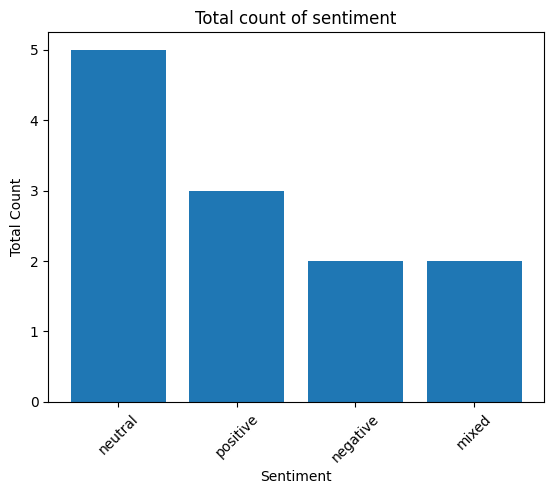

In [ ]:
import matplotlib.pyplot as plt



# Extract category names and corresponding amounts
#categories = list(category_amount.keys())
#amounts = list(category_amount.values())

# Plotting the bar graph
plt.bar(list(category_amount.keys()), list(category_amount))

# Customize the plot
plt.xlabel('Sentiment')
plt.ylabel('Total Count')
plt.title('Total count of sentiment')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
reddit_url = 'https://www.reddit.com/r/dataanalysis/'
hyperlinks = parse_elements(reddit_url, 'a')

In [ ]:
# Print the string versions of the hyperlinks
links_list = []
for hyperlink in hyperlinks:
    if len(hyperlink.absolute_links) > 0:
      if ((hyperlink.absolute_links).pop()).count('/r/dataanalysis/comments') > 0:
        #print("count is greater")
        if (hyperlink.absolute_links).pop() not in links_list:
          #print('not in list')
          links_list.append(((hyperlink.absolute_links).pop()))
          print((hyperlink.absolute_links).pop())


def get_threads(webdata,name):
  for hyperlink in webdata:
    if len(hyperlink.absolute_links) > 0:
      if ((hyperlink.absolute_links).pop()).count(f'/r/{name}/comments') > 0:
        print((hyperlink.absolute_links).pop())
      #let's add some code to add each hyperlink to a list!
      #then we can add the list to a dictionary and make it a pandas dataframe


https://www.reddit.com/r/dataanalysis/comments/14b8n7l/reddit_is_killing_thirdparty_applications_and/
https://www.reddit.com/r/dataanalysis/comments/14o43h1/megathread_how_to_get_into_data_analysis/
https://www.reddit.com/r/dataanalysis/comments/14xnu7z/essential_statistical_concepts_for_data_analysis/
https://www.reddit.com/r/dataanalysis/comments/14wr4sb/need_some_help_if_you_see_this_please_stop_by_and/
https://www.reddit.com/r/dataanalysis/comments/14v0h0j/are_new_updates_to_chatgpt_concerning_for_data/
https://www.reddit.com/r/dataanalysis/comments/14v4zdi/capsule_networks_explained/


In [ ]:
links_list

['https://www.reddit.com/r/dataanalysis/comments/14b8n7l/reddit_is_killing_thirdparty_applications_and/',
 'https://www.reddit.com/r/dataanalysis/comments/14o43h1/megathread_how_to_get_into_data_analysis/',
 'https://www.reddit.com/r/dataanalysis/comments/14xnu7z/essential_statistical_concepts_for_data_analysis/',
 'https://www.reddit.com/r/dataanalysis/comments/14wr4sb/need_some_help_if_you_see_this_please_stop_by_and/',
 'https://www.reddit.com/r/dataanalysis/comments/14v0h0j/are_new_updates_to_chatgpt_concerning_for_data/',
 'https://www.reddit.com/r/dataanalysis/comments/14v4zdi/capsule_networks_explained/']

In [ ]:
threads_dictionary = {}
for link in links_list:
  content = parse_elements(link, 'body')
  threads_dictionary[link] = content

In [ ]:
(threads_dictionary['https://www.reddit.com/r/dataanalysis/comments/14b8n7l/reddit_is_killing_thirdparty_applications_and/'][0].find('p')[0].text)

'We have taken the subreddit dark in protest of the change in Reddit policies around third-party access to APIs. These changes would negatively affect Reddit as a community. For further information, please read: https://www.theverge.com/2023/6/8/23754780/reddit-api-updates-changes-news-announcements'

In [ ]:
#we can build some code here to
# Convert dictionary to DataFrame
df = pd.DataFrame(some_dictionary)

# Print the DataFrame
print(df)

In [ ]:
#let's say we now want to iterate through each hyperlink for EACH thread and obtain the data from each thread and analyze it
#We can look at all the paragraphs to see what people are talking about
#perhaps we may want to see how often people are mentioning SPECIFIC topics
#We could repurpose our topic detection to look for even more topics
#it might make sense to get a topic COUNT rather than just a yes or no for a specific topic

In [ ]:
#takes a paragraph as string and breaks it down into sentences
def sentence_list(paragraph_string):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    list_of_sentences = tokenizer.tokenize(paragraph_string)
    return list_of_sentences

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="jonaskoenig/topic_classification_04")

Some layers from the model checkpoint at jonaskoenig/topic_classification_04 were not used when initializing TFBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at jonaskoenig/topic_classification_04.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("jonaskoenig/topic_classification_04")
model = AutoModelForSequenceClassification.from_pretrained("jonaskoenig/topic_classification_04", from_tf=True)


All TF 2.0 model weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


In [ ]:
text = "This is about finance"
inputs = tokenizer.encode_plus(text, padding="longest", truncation=True, return_tensors="pt")


In [ ]:
outputs = model(**inputs)
logits = outputs.logits


In [ ]:
logits

tensor([[-1.5593,  0.2835, -1.5148,  3.3633, -0.4707, -1.9771,  4.4456, -2.2627,
         -2.6042, -0.2672]], grad_fn=<AddmmBackward0>)

In [ ]:
pip install tensorflow==2.12.


In [ ]:
text = "This is an example sentence."
inputs = tokenizer.encode_plus(text, padding="longest", truncation=True, return_tensors="pt")


In [ ]:
outputs = model(**inputs)
logits = outputs.logits
